In [87]:
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import openpyxl

# configuração inicial
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# saida
caminho_outputs = '../outputs' 

In [88]:
# Leitura 
df = pd.read_csv('../data/track_data_final.csv')

# convertendo a coluna original de milissegundos para minutos
df["track_duration_ms"] = df["track_duration_ms"] / 60000

# renomeando a coluna (ms para min)
df = df.rename(columns={'track_duration_ms': 'track_duration_min'})
df['track_duration_min'] = df['track_duration_min'].round(2)

# limpeza dos dados
# convertendo para datetime e extraindo o ano
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')
df = df.dropna(subset=['album_release_date'])
df['year'] = df['album_release_date'].dt.year

# limpeza dos gêneros
# tratando strings vazias e convertendo para listas reais
df = df.dropna(subset=['artist_genres'])
df["artist_genres"] = df["artist_genres"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
df["artist_genres"] = df["artist_genres"].apply(
    lambda x: ["unknown"] if isinstance(x, list) and len(x) == 0 else x
)

print("Dados transformados e limpos.")
df.head(20)

Dados transformados e limpos.


,track_id,track_name,track_number,track_popularity,track_duration_min,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,year
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,3.55,False,Britney Spears,80.0,17755451.0,[pop],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation,2009
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,2.65,False,BUNT.,69.0,293734.0,[stutter house],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single,2023
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,3.76,False,Taylor Swift,100.0,145396321.0,[unknown],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album,2021
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,2.64,True,Billie Eilish,90.0,118692183.0,[unknown],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album,2021
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,4.45,False,Rihanna,90.0,68997177.0,[unknown],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album,2010
5,7H0ya83CMmgFcOhw0UB6ow,Space Song,3,77,5.34,False,Beach House,72.0,2803036.0,[dream pop],194CqC2Zi0kUFEPWedb3qr,Depression Cherry,2015-08-28,9,album,2015
6,41zXlQxzTi6cGAjpOXyLYH,idontwannabeyouanymore,2,78,3.39,False,Billie Eilish,90.0,118692183.0,[unknown],7fRrTyKvE4Skh93v97gtcU,dont smile at me,2017-12-22,9,single,2017
7,13jRFAGT8qd6aBwtJySlUm,Allein Allein - BENNETT Remix,1,52,2.43,False,Alok,76.0,11247155.0,"[brazilian bass, electronic, slap house, elect...",1WKoDELzbFRR6UWNGh50LO,Allein Allein (feat. FREY) [BENNETT Remix],2024-09-27,2,single,2024
8,0N5zjRnf8AreOm95iSBXF4,Even My Dad Does Sometimes,15,50,3.81,False,Ed Sheeran,88.0,122773292.0,[soft pop],1xn54DMo2qIqBuMqHtUsFd,x (Deluxe Edition),2014-06-21,16,album,2014
9,0qUcpOOna3kkrwfqky85e1,Eyes Blue Like The Atlantic (feat. Subvrbs),1,63,2.58,False,Sista Prod,48.0,68226.0,[unknown],5UYjxc4HIYeesKS0WJlhEI,Eyes Blue Like The Atlantic (feat. Subvrbs),2020-07-20,1,single,2020


In [89]:
# contagem para descobrir quantas músicas existem por ano
contagem_por_ano = df['year'].value_counts()

# regra: apenas anos com 3 ou mais músicas entram na análise, para não prejudicar o cálculo da média/mediana.
anos_validos = contagem_por_ano[contagem_por_ano >= 3].index

# criando o dataframe final usando apenas os anos válidos
df_final = df[df['year'].isin(anos_validos)].copy()

print(f"Intervalo de anos analisado: {min(anos_validos)} até {max(anos_validos)}")

Intervalo de anos analisado: 1962 até 2025


Gráfico salvo como imagem!


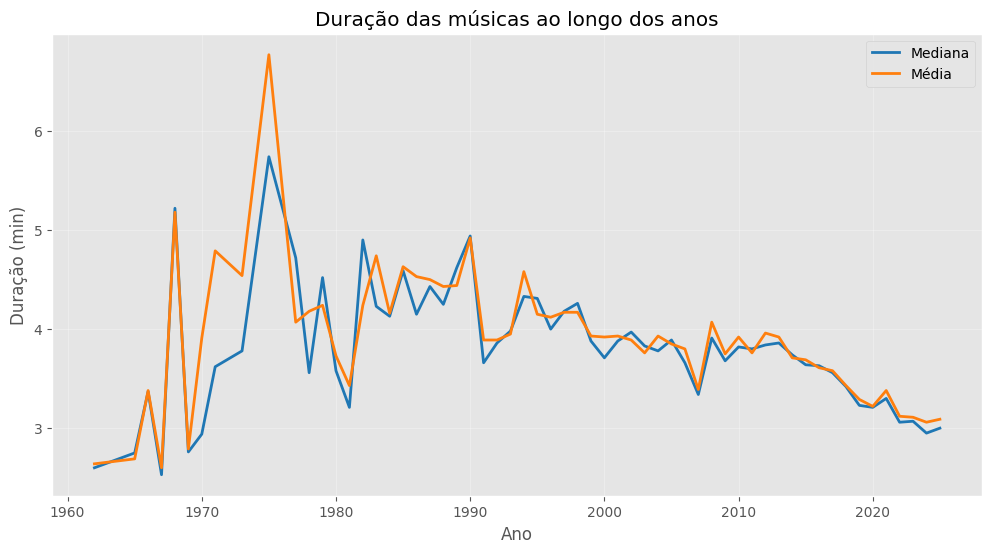

In [90]:
# cálculo da média e mediana por ano
media_por_ano = df_final.groupby("year")["track_duration_min"].mean().reset_index()
mediana_por_ano = df_final.groupby("year")["track_duration_min"].median().reset_index()

# arrendondado para 2 casas decimais
media_por_ano['track_duration_min'] = media_por_ano["track_duration_min"].round(2)
mediana_por_ano['track_duration_min'] = mediana_por_ano["track_duration_min"].round(2)

# plotagem do gráfico
plt.figure(figsize=(12, 6))

plt.plot(mediana_por_ano["year"], mediana_por_ano["track_duration_min"], 
         label='Mediana', color='tab:blue', linewidth=2)

plt.plot(media_por_ano["year"], media_por_ano["track_duration_min"], 
         label='Média', color='tab:orange', linewidth=2)

plt.legend()
plt.xlabel("Ano")
plt.ylabel("Duração (min)")
plt.title('Duração das músicas ao longo dos anos')
plt.grid(True, alpha=0.3)

# salvar png do gráfico:
plt.savefig(f'{caminho_outputs}/grafico_duracao_musicas_ano.png', dpi=300, bbox_inches='tight')
print("Gráfico salvo como imagem!")

plt.show()

In [91]:
media_por_ano

,year,track_duration_min
0,1962,2.64
1,1965,2.69
2,1966,3.38
3,1967,2.60
4,1968,5.18
...,...,...
54,2021,3.38
55,2022,3.12
56,2023,3.11
57,2024,3.06


In [ ]:
# cria a pasta outputs se ela não existir (segurança) 
if not os.path.exists(caminho_outputs):
    os.makedirs(caminho_outputs)

# salva o XLSX limpo (df_final)
df_final.to_excel(f'{caminho_outputs}/spotify_dados_processados.xlsx', index=False)
print("Dataframe limpo e processado salvo com sucesso!")

# salva a tabela de médias e medianas
media_por_ano.to_csv(f'{caminho_outputs}/resumo_medias_por_ano.csv', index=False)
mediana_por_ano.to_csv(f'{caminho_outputs}/resumo_mediana_por_ano.csv', index=False)
print("Tabelas salvas com sucesso!")

Dataframe limpo e processado salvo com sucesso!
Tabelas salvas com sucesso!
